In [179]:
import pandas as pandas
import numpy as np
import pickle
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import string
import re
import nltk
from nltk.corpus import stopwords
import itertools as itertools

In [180]:
df=pandas.read_csv('Final13022.csv',encoding='windows-1252')

In [181]:
df.shape

(2596, 7)

In [5]:
conversion_dict={0:'False',1:'True'}

In [6]:
df['label']=df['label'].replace(conversion_dict)#Replace 1,0 to real and fake

In [7]:
df.shape

(2596, 7)

<Axes: xlabel='label_text', ylabel='count'>

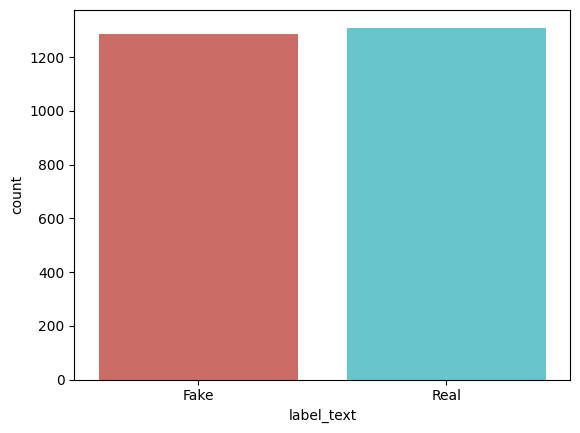

In [182]:
import seaborn as sb
def create_distribution(datafile):
    return sb.countplot(x='label_text',data =datafile, palette ='hls')
create_distribution(df)

In [183]:
def data_qualityCheck():
    df.isnull().sum()
    df.info()
    
data_qualityCheck()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   myId        2596 non-null   int64 
 1   id          2596 non-null   int64 
 2   filename    2596 non-null   object
 3   title       1301 non-null   object
 4   text        2596 non-null   object
 5   label_text  2596 non-null   object
 6   label       2596 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 142.1+ KB


In [10]:
y=df.label_text
y.head()

0    Fake
1    Real
2    Real
3    Fake
4    Fake
Name: label_text, dtype: object

In [11]:
#

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(df['text'],y,test_size=0.20,random_state=9)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(df['text'],y,test_size=0.20,random_state=9)

In [14]:
df.drop("label_text",axis=1)

,myId,id,filename,title,text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,False
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,True
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,True
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,False
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,False
...,...,...,...,...,...,...
2591,4409,4056,2_news_4129,NaN,Vitamin C with Zinc prevent and treat the coro...,False
2592,4410,4059,2_news_4129,NaN,Video of a girl dying of coronavirus in a shop...,False
2593,4411,4062,2_news_4129,NaN,The first patient diagnosed with COVID-19 was ...,False
2594,4412,4063,2_news_4129,NaN,You no longer need to have contact with someon...,False


In [15]:
y_test.head(10)

969     Fake
709     Real
1655    Real
721     Real
2589    Fake
1314    Real
2468    Fake
589     Real
2242    Fake
151     Fake
Name: label_text, dtype: object

In [16]:
X_train.head(10)

211     In our previous analysis we warned traders tha...
2460    You can maintain the alkaline state of the bod...
846     There is no need for the public to wear surgic...
1022    Under the category, the more things change, th...
2235    Why you should not take seriously this card on...
2591    Vitamin C with Zinc prevent and treat the coro...
1468    Most quarantine decisions are up to states and...
1905    It occurs to me that the world wide death rare...
2419    The Simpsons have predicted the coronavirus pa...
1837    A midshipman at the U.S. Naval Academy in Anna...
Name: text, dtype: object

In [17]:
X_test.head(10)

969     An uproar took place in a kindergarten in Rish...
709     The 2019 novel coronavirus is a new virus that...
1655         Nah. DJT said its all set. CDC is in control
721     While there is no scientific link that connect...
2589    The Chinese company Ruilan Bao Hu San Biotech ...
1314    The Trump administration recently announced pl...
2468      The Chinese accept Islam en masse (20 millions)
589     “When you've got had current vacation to Wuhan...
2242       You can get coronavirus from makeup and creams
151     Traditional infection-control and public healt...
Name: text, dtype: object

In [185]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [186]:
cleaned_corpus =[]
for tt in X_train:
    cleaned_text =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned_text=re.sub('\n','',cleaned_text) #Remove New lines
    cleaned_text = cleaned_text.lower()
    cleaned_text = remove_stopwords(cleaned_text)
    cleaned_corpus.append(cleaned_text)

In [187]:
tokenized_corpus = []   
for sentence in cleaned_corpus:
    tokens = nltk.word_tokenize(sentence)
    tokenized_corpus.append(tokens)
#len(tokenized_corpus)
joined_tokens = [' '.join(tokens) for tokens in tokenized_corpus]
#len(joined_tokens)

2076

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
print(count_vectorizer)
print(count_train)

CountVectorizer(stop_words='english')
  (0, 18010)	1
  (0, 2105)	3
  (0, 24683)	1
  (0, 23259)	1
  (0, 14396)	1
  (0, 18792)	1
  (0, 13946)	1
  (0, 6005)	1
  (0, 21928)	1
  (0, 14526)	1
  (0, 7666)	1
  (0, 15164)	1
  (0, 4128)	3
  (0, 15318)	1
  (0, 14881)	1
  (0, 25248)	1
  (0, 19721)	1
  (0, 13527)	1
  (0, 19862)	1
  (0, 21515)	1
  (0, 4215)	1
  (0, 21762)	1
  (0, 391)	1
  (0, 15660)	1
  (0, 10306)	2
  :	:
  (2075, 2904)	1
  (2075, 19065)	1
  (2075, 13862)	1
  (2075, 8662)	1
  (2075, 20986)	2
  (2075, 1402)	1
  (2075, 1662)	1
  (2075, 9479)	1
  (2075, 15991)	1
  (2075, 6111)	1
  (2075, 17704)	1
  (2075, 17410)	1
  (2075, 4428)	1
  (2075, 12030)	2
  (2075, 10645)	2
  (2075, 4960)	1
  (2075, 5037)	1
  (2075, 20233)	1
  (2075, 2418)	1
  (2075, 10125)	1
  (2075, 10449)	2
  (2075, 4969)	2
  (2075, 19282)	1
  (2075, 10646)	1
  (2075, 5039)	1


In [19]:
def get_countVectorizer_stats():
    print(count_train.shape)
    print(count_vectorizer.vocabulary_)
    
get_countVectorizer_stats()

(2076, 25399)
{'previous': 18010, 'analysis': 2105, 'warned': 24683, 'traders': 23259, 'markets': 14396, 'rapidly': 18792, 'lose': 13946, 'coronavirus': 6005, 'story': 21928, 'maybe': 14526, 'doubts': 7666, 'monday': 15164, 'bullish': 4128, 'movement': 15318, 'mild': 14881, 'yesterday': 25248, 'rise': 19721, 'leave': 13527, 'room': 19862, 'speculation': 21515, 'buyers': 4215, 'statement': 21762, '2019': 391, 'ncov': 15660, 'going': 10306, 'stop': 21910, 'party': 16937, 'sp500': 21436, 'bounces': 3832, 'horizontal': 11301, 'support': 22240, 'established': 8551, 'january': 12629, 'created': 6212, 'double': 7659, 'formation': 9621, 'went': 24831, 'north': 16002, 'additionally': 1521, 'price': 18015, 'broke': 4012, 'upper': 24026, 'line': 13751, 'bearish': 3229, 'correction': 6030, 'technical': 22643, 'pretty': 17992, 'clear': 5129, 'brace': 3876, 'new': 15793, 'long': 13906, 'term': 22754, 'highs': 11094, 'coming': 5386, 'dax': 6603, 'different': 7179, 'shape': 20732, 'reversal': 19603, '

In [20]:
count_test=count_vectorizer.transform(X_test)
count_test

<520x25399 sparse matrix of type '<class 'numpy.int64'>'
	with 46963 stored elements in Compressed Sparse Row format>

In [188]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [189]:

tfidf_train = tfidf_vectorizer.fit_transform(joined_tokens)

In [190]:
def get_tfidf_stats():
    tfidf_train.shape
    print(tfidf_train.A[:10])
get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [191]:
#Transform the test data
cleaned_corpus_test =[]
for tt in X_test:
    cleaned_text =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned_text=re.sub('\n','',cleaned_text) #Remove New lines
    cleaned_text = cleaned_text.lower()
    cleaned_text = remove_stopwords(cleaned_text)
    cleaned_corpus_test.append(cleaned_text)
    
tokenized_corpus_test = []   
for sentence in cleaned_corpus_test:
    tokens = nltk.word_tokenize(sentence)
    tokenized_corpus_test.append(tokens)

joined_tokens_test = [' '.join(tokens) for tokens in tokenized_corpus_test]
len(joined_tokens_test)
    

tfidf_test = tfidf_vectorizer.transform(joined_tokens_test)
tfidf_test
#newTest_X  = tfidf_vectorizer.transform([' '.join(tokens) for tokens in tokenized_text])
#newTest_X

<520x36182 sparse matrix of type '<class 'numpy.float64'>'
	with 45121 stored elements in Compressed Sparse Row format>

In [192]:
#get the extracted features
print(tfidf_vectorizer.get_feature_names_out()[-10:])

['zuckerberg' 'zulfikar' 'zulu' 'zuo' 'zureikat' 'zverev' 'zverevdjokovic'
 'zweli' 'électricité' 'šarec']


In [26]:
#get the extracted features
print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '001' '00102' '00127' '0024' '0048' '005' '00am']


In [193]:
tfidf_test_df=pandas.DataFrame(tfidf_test.A,columns=tfidf_vectorizer.get_feature_names_out())
tfidf_test_df.head()

,000,0000dead,00024,00048,001,001case,002,0021,0025,004,...,zuckerberg,zulfikar,zulu,zuo,zureikat,zverev,zverevdjokovic,zweli,électricité,šarec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
count_df = pandas.DataFrame(count_train.A,columns=count_vectorizer.get_feature_names_out())
tfidf_df = pandas.DataFrame(tfidf_train.A,columns=tfidf_vectorizer.get_feature_names_out())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [28]:
print(count_df.equals(tfidf_df))

False


In [29]:
print(count_df.head())

   00  000  0000  001  00102  00127  0024  0048  005  00am  ...  zte  \
0   0    1     0    0      0      0     0     0    0     0  ...    0   
1   0    0     0    0      0      0     0     0    0     0  ...    0   
2   0    0     0    0      0      0     0     0    0     0  ...    0   
3   0    0     0    0      0      0     0     0    0     0  ...    0   
4   0    0     0    0      0      0     0     0    0     0  ...    0   

   zuckerberg  zulfikar  zulu  zuo  zureikat  zverev  zweli  électricité  \
0           0         0     0    0         0       0      0            0   
1           0         0     0    0         0       0      0            0   
2           0         0     0    0         0       0      0            0   
3           0         0     0    0         0       0      0            0   
4           0         0     0    0         0       0      0            0   

   šarec  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 25399 columns]


In [147]:
print(tfidf_df.head())

    00       000  0000  001  00102  00127  0024  0048  005  00am  ...  zte  \
0  0.0  0.035413   0.0  0.0    0.0    0.0   0.0   0.0  0.0   0.0  ...  0.0   
1  0.0  0.000000   0.0  0.0    0.0    0.0   0.0   0.0  0.0   0.0  ...  0.0   
2  0.0  0.000000   0.0  0.0    0.0    0.0   0.0   0.0  0.0   0.0  ...  0.0   
3  0.0  0.000000   0.0  0.0    0.0    0.0   0.0   0.0  0.0   0.0  ...  0.0   
4  0.0  0.000000   0.0  0.0    0.0    0.0   0.0   0.0  0.0   0.0  ...  0.0   

   zuckerberg  zulfikar  zulu  zuo  zureikat  zverev  zweli  électricité  \
0         0.0       0.0   0.0  0.0       0.0     0.0    0.0          0.0   
1         0.0       0.0   0.0  0.0       0.0     0.0    0.0          0.0   
2         0.0       0.0   0.0  0.0       0.0     0.0    0.0          0.0   
3         0.0       0.0   0.0  0.0       0.0     0.0    0.0          0.0   
4         0.0       0.0   0.0  0.0       0.0     0.0    0.0          0.0   

   šarec  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows

In [194]:
#plot confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = "center",
                color= "white" if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Fake label')
    

In [195]:
#builing naive classifier model
nb_pipeline = Pipeline([('NBTV',tfidf_vectorizer),('nb_clf', MultinomialNB())])

In [196]:
nb_pipeline.fit(joined_tokens, y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [34]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [197]:

#test vector
predicted_nbt = nb_pipeline.predict(joined_tokens_test)
score = metrics.accuracy_score(y_test,predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 75.19%


In [87]:
#test vector
predicted_nbt = nb_pipeline.predict(X_test)

In [88]:
score = metrics.accuracy_score(y_test,predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 75.0%


In [56]:
lbl = y_test.value_counts(False).argmax()
lbl
#y_test.head

0

In [109]:
#y_test.to_numpy()

In [174]:
#predicted_nbt.shape
predicted_nbt
pandas.Series(predicted_nbt)

0      Real
1      Real
2      Real
3      Real
4      Fake
       ... 
515    Real
516    Real
517    Real
518    Fake
519    Real
Length: 520, dtype: object

Confusion matrix without normalization


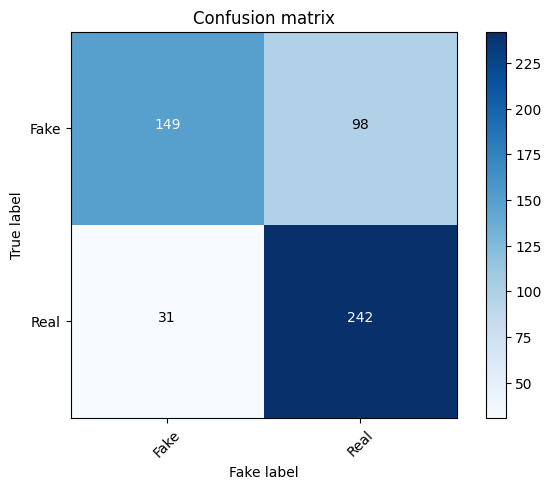

In [198]:
cm = metrics.confusion_matrix(y_test.to_numpy(),predicted_nbt,labels=['Fake','Real'])
cm
plot_confusion_matrix(cm,classes=['Fake','Real'])

In [119]:
#builing naive classifier model
nbc_pipeline = Pipeline([('NBTV',count_vectorizer),('nb_clf', MultinomialNB())])
nbc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('NBTV', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [120]:
predicted_nbc=nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(y_test,predicted_nbc)
print(f' Accuracy:{round(score*100,2)}%')

 Accuracy:70.0%


Confusion matrix without normalization


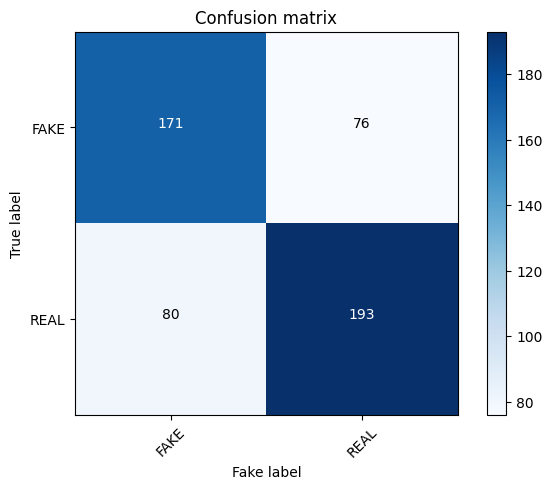

In [122]:
cm1 = metrics.confusion_matrix(y_test,predicted_nbc,labels=['Fake', 'Real'])
plot_confusion_matrix(cm1,classes=['FAKE','REAL'])

In [199]:
print(metrics.classification_report(y_test,predicted_nbt))

              precision    recall  f1-score   support

        Fake       0.83      0.60      0.70       247
        Real       0.71      0.89      0.79       273

    accuracy                           0.75       520
   macro avg       0.77      0.74      0.74       520
weighted avg       0.77      0.75      0.75       520



In [176]:
print(metrics.classification_report(y_test,predicted_nbt))

              precision    recall  f1-score   support

        Fake       0.83      0.60      0.70       247
        Real       0.71      0.89      0.79       273

    accuracy                           0.75       520
   macro avg       0.77      0.74      0.74       520
weighted avg       0.77      0.75      0.75       520



In [109]:
print(metrics.classification_report(y_test,predicted_nbc))

              precision    recall  f1-score   support

        Fake       0.68      0.69      0.69       247
        Real       0.72      0.71      0.71       273

    accuracy                           0.70       520
   macro avg       0.70      0.70      0.70       520
weighted avg       0.70      0.70      0.70       520



In [200]:
testn1='Singapore is rapidly building bed space for coronavirus patients in cavernous exhibition halls and other temporary facilities as it faces a surge in cases, mainly among its large community of low-paid migrant workers.One such facility at Changi Exhibition Center – home to the Singapore Airshow, Asia’s biggest aerospace gathering – could eventually house over 4,000 patients recovering from the disease and those with mild symptoms.“The entire process of setting up the infrastructure took six days,” Joseph Tan, a member of the organizing committee for the temporary facility, told Reuters on a visit.The tiny city-state of 5.7 million people registered 931 new coronavirus infections, its health ministry said on Sunday, taking the total number of COVID-19 cases to 13,624. The number of new cases rose from 618 reported on Saturday.The vast majority of the new cases are migrant workers living in dormitories, the health ministry said in the statement. Fifteen of the new cases are permanent residents.Singapore now has one of the highest infection rates in Asia, according to official figures, due to outbreaks in cramped dormitories housing over 300,000 mainly South Asian workers.The first patients, mainly from Bangladesh and India, were moved on Saturday into the vast conference hall, partitioned into rooms for eight to 10 people, with metal beds, plastic storage drawers and fans.Singapore trails only China, India, Japan and Pakistan in Asia for the number of coronavirus infections. More than 10,000 of those infected, some 80% of its total, are foreign workers, many of whom have been placed in “isolation facilities” for people with mild symptoms such as the conference centers.Despite the high total of cases, Singapore has reported 12 deaths and 24 people are in intensive care.Singapore’s young overseas laborers, earning as little as $15 a day, live in dormitories with bunk-bed accommodation in areas little visited by tourists to the modern city-state. Many are under government-ordered quarantines due to mass outbreaks, with workers left inside battling a constant fear of catching the virus.At the new Changi isolation center, each room has blood-pressure monitors and other medical equipment for patients to conduct their own health checks three times daily, while remote-controlled robots provide meals and teleconferencing services to reduce contact.Authorities are also trialing a four-legged robot dog built by Boston Dynamics at the facility, which they said could be used to deliver medicines to patients or take their temperature.The indoor space can house 2,700 patients, while an ongoing outdoor extension will add another 1,700 beds. A nearby conference center called EXPO is already housing hundreds of COVID-19 patients.Around 10,000 healthy workers in essential services have been moved from dormitories into alternative housing, including military camps, converted sports halls and accommodation ships for offshore workers, authorities say.Rows of white huts are also being hurriedly assembled at the Tanjong Pagar shipping-container port. The facility could house up to 15,000 foreign workers, local media reported, but authorities have yet to decide how it will be used.“We are continuing to explore additional space for various reasons, including facilities for suspect cases or infected workers, and also for workers who are recovering or who have fully recovered,” a spokeswoman for the Ministry of National Development said in an emailed statement, adding that the Tanjong Pagar site was part of that plan.'
testn1=[testn1]
predicted_nbt = nb_pipeline.predict(testn1)
predicted_nbt
#count_test1=count_vectorizer.transform(testn1)
#count_test1

array(['Real'], dtype='<U4')

In [201]:
test2 = 'The media spent all night in a frothing fit because President Trump told reporters that he is taking the anti-malaria drug hydroxychloroquine, as a precaution against coronavirus.Trump told reporter that he hopes not to be taking the medication for long, but that he believes it’s effective, and that “people should be allowed to.”  The media immediately called Trump irresponsible, with some vowing that the drug would “kill him” and anyone else who takes it. Nancy Pelosi seized on the moment to call Trump “morbidly obese”: Senate Democratic leader Chuck Schumer called Trump’s remarks about hydroxychloroquine “dangerous.”“Maybe he’s really not taking it because the president lies about things characteristically,” Schumer said on MSNBC.He added: “I don’t know whether he is taking it or not. I know him saying he is taking it, whether he is or not, is reckless, reckless, reckless.” Even the communist Chinese government got in on the act, claiming that Trump is trying to beat coronavirus with “witchcraft”: It’s not witchcraft, it’s a drug that has proven effective against the virus. Cutting horns off Rhinos and sniffing them is witchcraft'
test2 = [test2]
predicted_nbt = nb_pipeline.predict(test2)
predicted_nbt

array(['Fake'], dtype='<U4')

In [202]:
cm

array([[149,  98],
       [ 31, 242]], dtype=int64)

In [206]:
import re
regex = re.compile(r"^(?!stackoverflow$)[sS][tT][aA][cC][kK][oO][vV][eE][rR][fF][lL][oO][wW]$");
string = "The quick brown stackoverflow jumps over the lazy dog"
if re.search(regex, string):
    print("The string contains 'stackoverflow'")
else:
    print("The string does not contain 'stackoverflow'")

The string does not contain 'stackoverflow'


In [209]:
regex = re.compile(r"^(?!stackoverflow$)[sS][tT][aA][cC][kK][oO][vV][eE][rR][fF][lL][oO][wW]$");
txt = "The rain stackoverflow Spain"
x = re.search(regex, txt)

if x:
  print("YES! We have a match!")
else:
  print("No match")


No match


In [213]:
import re

# Define the target word you want to check (e.g., 'stackoverflow')
target_word = 'stackoverflow'

# Define the text you want to search in
text = "StackOverflow is a popular platform for programming discussions. stackOverFlow is great!"

# Use a regular expression to find the word in any case
pattern = re.compile(r'\b{}\b'.format(re.escape(target_word)), re.IGNORECASE)

# Search for the pattern in the text
matches = pattern.findall(text)

if matches:
    print(f"'{target_word}' found in the text.")
else:
    print(f"'{target_word}' not found in the text.")


'stackoverflow' found in the text.


In [5]:
corpus = df['text'].tolist()
labels = df['label'].tolist()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(corpus,labels,test_size=0.20,random_state=9,shuffle=True)

In [12]:
import pandas as pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import string
import re
import nltk
from nltk.corpus import stopwords

In [24]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [25]:
cleaned_corpus =[]
for tt in X_train:
    cleaned_text =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned_text=re.sub('\n','',cleaned_text) #Remove New lines
    cleaned_text = cleaned_text.lower()
    cleaned_text = remove_stopwords(cleaned_text)
    cleaned_corpus.append(cleaned_text)


In [27]:
tokenized_corpus = []   
for sentence in cleaned_corpus:
    tokens = nltk.word_tokenize(sentence)
    tokenized_corpus.append(tokens)

In [32]:
tfidf_vectorizer=TfidfVectorizer()
Xt_vec = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_corpus])
Xt_vec

<2076x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 216393 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.neighbors import KNeighborsClassifier
global knn
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(Xt_vec,y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
news='Delhi: Eight nurses test positive for Covid-19 at Kalawati Saran Hospital. Another nurse at the Kalawati Saran Hospital in central Delhi has tested positive for Covid-19, taking to eight the total number of nurses there affected by the highly infectious disease. At least 8 nurses at Kalawati Saran Hospital have tested positive for novel coronavirus , a source told IANS on Sunday, adding that the nurses had been working at the hospitals paediatric ward. Their tests were conducted at the Lady Hardinge Hospital. All are now admitted in the isolation ward and their contacts have been traced and sent for home isolation.There are many healthcare workers who have tested positive for novel coronavirus, however, the government has not released any separate data on them. The source said: Now we have to face this. Sometimes a doctor test is turning positive, another time it is a nurse. We have been fighting on the forefront.The largest number of infected hospital workers has been reported from Babu Jagjivan Ram Memorial Hospital where as many as 58 staffers, including doctors and nurses, of the hospital have tested positive for coronavirus, Of them, 70 per cent were asymptomatic. Prior to this, a doctor and two nurses from the Lok Nayak Hospital had tested positive. Other hospitals in the national capital that have reported positive cases of novel coronavirus amongst health workers are the Ram Manohar Lohia Hospital , Safdarjung Hospital, Max Hospital, Sir Ganga Ram Hospital, and various Mohalla clinic etc.'
testData = [news]
testData

['Delhi: Eight nurses test positive for Covid-19 at Kalawati Saran Hospital. Another nurse at the Kalawati Saran Hospital in central Delhi has tested positive for Covid-19, taking to eight the total number of nurses there affected by the highly infectious disease. At least 8 nurses at Kalawati Saran Hospital have tested positive for novel coronavirus , a source told IANS on Sunday, adding that the nurses had been working at the hospitals paediatric ward. Their tests were conducted at the Lady Hardinge Hospital. All are now admitted in the isolation ward and their contacts have been traced and sent for home isolation.There are many healthcare workers who have tested positive for novel coronavirus, however, the government has not released any separate data on them. The source said: Now we have to face this. Sometimes a doctor test is turning positive, another time it is a nurse. We have been fighting on the forefront.The largest number of infected hospital workers has been reported from 

In [38]:
cleaned_text = []

for tt in testData:
    cleaned =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned=re.sub('\n','',cleaned) #Remove New lines
    cleaned = cleaned.lower()
    cleaned = remove_stopwords(cleaned)
    cleaned_text.append(cleaned)

cleaned_text    

['delhi eight nurses test positive covid19 kalawati saran hospital another nurse kalawati saran hospital central delhi tested positive covid19 taking eight total number nurses affected highly infectious disease least 8 nurses kalawati saran hospital tested positive novel coronavirus source told ians sunday adding nurses working hospitals paediatric ward tests conducted lady hardinge hospital admitted isolation ward contacts traced sent home isolationthere many healthcare workers tested positive novel coronavirus however government released separate data source said face sometimes doctor test turning positive another time nurse fighting forefrontthe largest number infected hospital workers reported babu jagjivan ram memorial hospital many 58 staffers including doctors nurses hospital tested positive coronavirus 70 per cent asymptomatic prior doctor two nurses lok nayak hospital tested positive hospitals national capital reported positive cases novel coronavirus amongst health workers ra

In [39]:
tokenized_text = []   
for sentence in cleaned_text:
    tokens = nltk.word_tokenize(sentence)
    tokenized_text.append(tokens)
    
newTest_X = tfidf_vectorizer.transform([' '.join(tokens) for tokens in tokenized_text])
newTest_X

<1x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [42]:
y_pred=knn.predict(newTest_X)
y_pred

array(['False'], dtype='<U5')

In [43]:
news1='We can now officially put to rest all comparisons of COVID-19 to influenza. Coronavirus is killing more Americans than the flu and almost everything else. According to data compiled by the Washington Post, COVID-19 is now the second-leading cause of death in America.The upward march of these numbers is steady and disturbing. The week of March 16, COVID-19 didn’t rank among the 15 most common causes of death. The next week, it ranked seventh. The following week, it moved up to third. The week of April 6, COVID-19 killed more people than anything besides heart disease.These numbers are a tragic milestone, and they’re also a verdict on attempts to downplay the severity of this event. Messaging from political leaders and some media voices early in this outbreak comparing it to the flu were wrong. They might have been well-intentioned efforts to keep people from panicking, but that point is moot now.Coronavirus is the most formidable public health threat in a generation. The time for minimizing is over. The time for aggressive testing, social distancing and (hopefully soon) treatment is now.'
testData = [news1]
cleaned_text = []

for tt in testData:
    cleaned =re.sub(r'[^\w\s]', '', tt)#remove punctuation
    cleaned=re.sub('\n','',cleaned) #Remove New lines
    cleaned = cleaned.lower()
    cleaned = remove_stopwords(cleaned)
    cleaned_text.append(cleaned)

cleaned_text  

['officially put rest comparisons covid19 influenza coronavirus killing americans flu almost everything else according data compiled washington post covid19 secondleading cause death americathe upward march numbers steady disturbing week march 16 covid19 didnt rank among 15 common causes death next week ranked seventh following week moved third week april 6 covid19 killed people anything besides heart diseasethese numbers tragic milestone theyre also verdict attempts downplay severity event messaging political leaders media voices early outbreak comparing flu wrong might wellintentioned efforts keep people panicking point moot nowcoronavirus formidable public health threat generation time minimizing time aggressive testing social distancing hopefully soon treatment']

In [45]:
tokenized_text = []   
for sentence in cleaned_text:
    tokens = nltk.word_tokenize(sentence)
    tokenized_text.append(tokens)
    
newTest_X = tfidf_vectorizer.transform([' '.join(tokens) for tokens in tokenized_text])
newTest_X

<1x36369 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Row format>

In [46]:
y_pred=knn.predict(newTest_X)
y_pred

array(['False'], dtype='<U5')

In [1]:
import re

# Sample corpus with text containing "aaaif"
corpus = ["This is a sample sentence.", "aaaif is not a real word.", "Another example."]

# Define a function to filter out non-English or gibberish words
def filter_non_english(text):
    # Define a regular expression pattern to match valid English words
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    
    # Find all English words in the text
    english_words = english_word_pattern.findall(text)
    
    # Join the English words back into a single string
    filtered_text = ' '.join(english_words)
    
    return filtered_text

# Filter the corpus to remove non-English or gibberish words
filtered_corpus = [filter_non_english(text) for text in corpus]

# Print the filtered corpus
for text in filtered_corpus:
    print(text)


This is a sample sentence
aaaif is not a real word
Another example


In [2]:
from langdetect import detect

# Sample corpus with text containing "aaaif"
corpus = ["This is a sample sentence.", "aaaif is not a real word.", "Another example."]

# Define a function to filter out non-English or gibberish sentences
def filter_non_english_sentences(corpus):
    english_corpus = []
    for text in corpus:
        try:
            if detect(text) == 'en':
                english_corpus.append(text)
        except:
            pass
    return english_corpus

# Filter the corpus to remove non-English or gibberish sentences
filtered_corpus = filter_non_english_sentences(corpus)

# Print the filtered corpus
for text in filtered_corpus:
    print(text)


This is a sample sentence.
aaaif is not a real word.
Another example.


In [3]:
# Sample corpus with text containing "aaaif"
corpus = ["This is a sample sentence.", "aaaif is not a real word.", "Another example."]

# Define a function to filter out non-English or gibberish sentences
def filter_non_english_sentences(corpus, min_sentence_length=5):
    english_corpus = []
    for text in corpus:
        words = text.split()
        if len(words) >= min_sentence_length:
            english_corpus.append(text)
    return english_corpus

# Filter the corpus to remove non-English or gibberish sentences
filtered_corpus = filter_non_english_sentences(corpus)

# Print the filtered corpus
for text in filtered_corpus:
    print(text)


This is a sample sentence.
aaaif is not a real word.


In [7]:
# Sample corpus with text containing "aaaif"
corpus = ["This is a sample sentence.", "aaaif is not a real word.", "Another example."]

# Define a function to filter out sentences containing the word "aaaif"
def filter_sentences_without_word(corpus, word_to_exclude):
    filtered_corpus = [text for text in corpus if word_to_exclude not in text]
    return filtered_corpus

# Filter the corpus to remove sentences containing the word "aaaif"
filtered_corpus = filter_sentences_without_word(corpus, "aaaifd")

# Print the filtered corpus
for text in filtered_corpus:
    print(text)


This is a sample sentence.
aaaif is not a real word.
Another example.


In [9]:
pip install num2words

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     --------- ----------------------------- 30.7/125.2 kB 1.3 MB/s eta 0:00:01
     --------------------------- --------- 92.2/125.2 kB 871.5 kB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 815.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for docopt: started
  Running setup.py install for docopt: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: docopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from num2words import num2words
import re

# Sample text containing numbers
text = "There are 300580 apples and 20.5 oranges."

# Define a function to replace numbers with English words
def replace_numbers_with_words(text):
    # Find all numbers in the text
    numbers = re.findall(r'\d+', text)

    # Replace each number with its English word equivalent
    for num in numbers:
        word = num2words(int(num), to='cardinal')
        text = text.replace(num, word)

    return text

# Replace numbers in the text
result = replace_numbers_with_words(text)

# Print the result
print(result)


There are three hundred thousand, five hundred and eighty apples and twenty.five oranges.


In [15]:
import regex as re

# Sample text containing punctuation
tt = "This is some text with punctuation: Hello, world! 你好，世界！"

# Remove both ASCII and Unicode punctuation
cleaned_text = re.sub(r'[\p{P}\p{S}]', '', tt)

# Print the cleaned text
print(cleaned_text)


This is some text with punctuation Hello world 你好世界


In [16]:
pip install langdetect


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from langdetect import detect

# Sample corpus containing sentences in multiple languages
corpus = [
    "Naka-quarantine po sila, 14-days. Hindi po sila maaaring umalis sa kanilang mga quarters...",
    "(They are under a 14-day quarantine...",
    "May contact din po sa amin ang mga ibang Pilipino nating kasama doon...",
    "(The Filipinos aboard the ship also have contact with the embassy...",
    "Bolivar, meanwhile, said the embassy has not yet received reports...",
    "There are currently 300,000 Filipinos across Japan, he said."
]

# Define the desired language (e.g., English)
desired_language = 'en'

# Filter sentences in the desired language
filtered_corpus = [sentence for sentence in corpus if detect(sentence) == desired_language]

# Print the filtered corpus
for sentence in filtered_corpus:
    print(sentence)


(They are under a 14-day quarantine...
(The Filipinos aboard the ship also have contact with the embassy...
Bolivar, meanwhile, said the embassy has not yet received reports...
There are currently 300,000 Filipinos across Japan, he said.
